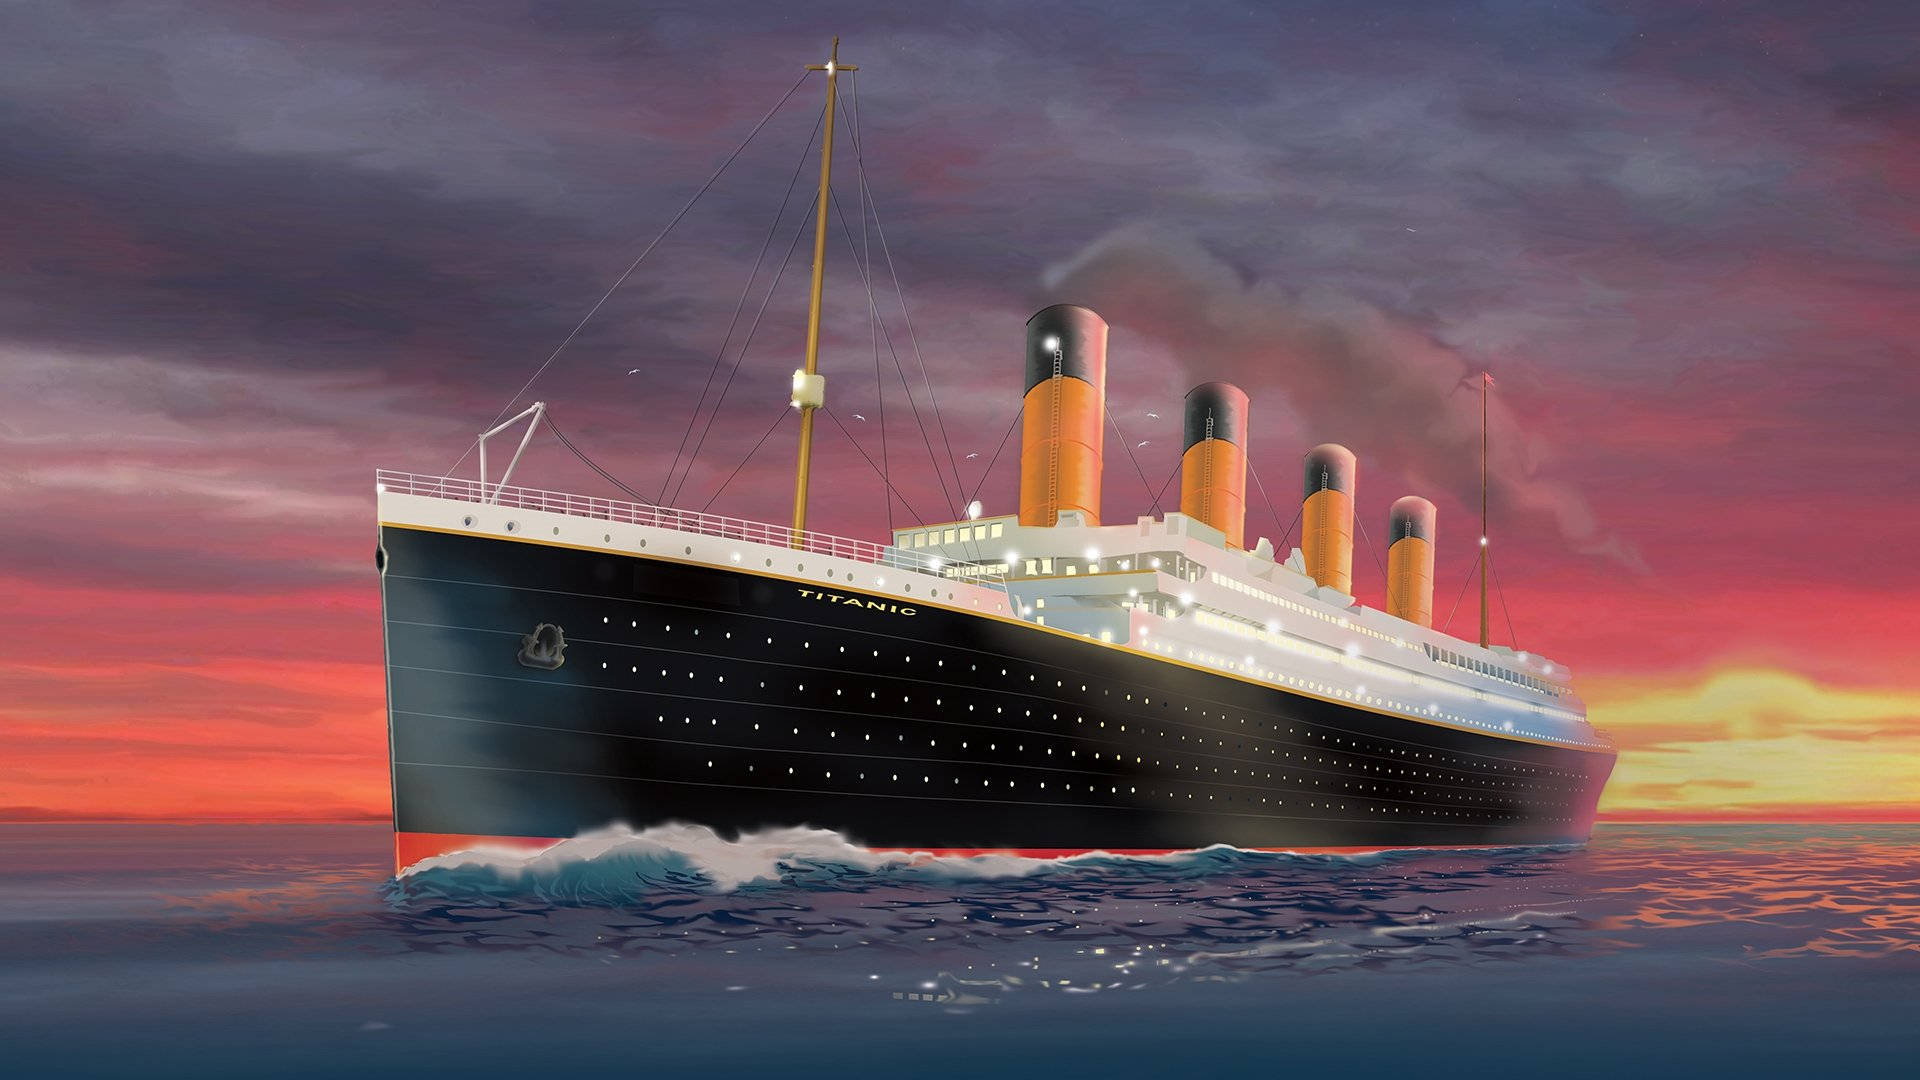

"I figure life's a Gift and I don't intend on wasting it"

In [61]:
from IPython.display import Image, display
image_path = 'titanic_ship.jpg'
image_title = "I figure life's a Gift and I don't intend on wasting it"
display(Image(filename=image_path), image_title)

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('titanic.csv')
print("shape of dataset is: ", data.shape)
pd.set_option('display.max_columns', None)
data.head()

shape of dataset is:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Analysis and Preprocessing of Data

In [3]:
data.shape

(891, 12)

In [4]:
#checking for missing values in dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#lets check the type of data for all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
missing_val = data[data['Age'].isnull()]
missing_val

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [7]:
mean_age_survived = data[data['Survived'] == 1]['Age'].mean()
mean_age_not_survived = data[data['Survived'] == 0]['Age'].mean()

data.loc[(data['Survived'] == 1) & (data['Age'].isnull()), 'Age'] = mean_age_survived
data.loc[(data['Survived'] == 0) & (data['Age'].isnull()), 'Age'] = mean_age_not_survived

# Now the 'Age' column has missing values filled based on survival status

In [8]:
missing_cabin = data['Cabin'].isnull().sum()
percentage_missing = missing_cabin/len(data) * 100
print("Percentage of missing values in Cabin: ",percentage_missing,"%")

Percentage of missing values in Cabin:  77.10437710437711 %


In [9]:
#Therefore dropping Cabin Column
data = data.drop(columns =['Cabin'], axis = 1)

Data Exploration

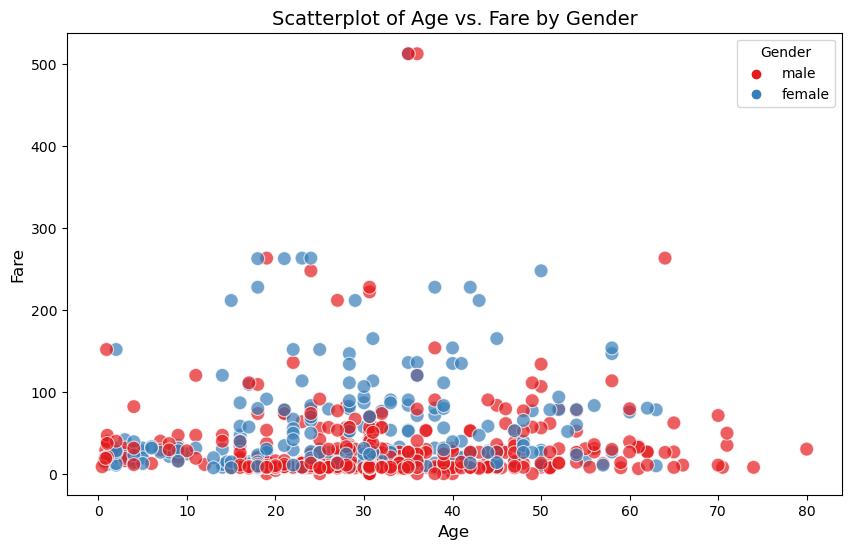

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=data, hue='Sex', palette='Set1', s=100, alpha=0.7)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.title('Scatterplot of Age vs. Fare by Gender', fontsize=14)
plt.legend(title='Gender')
plt.show()

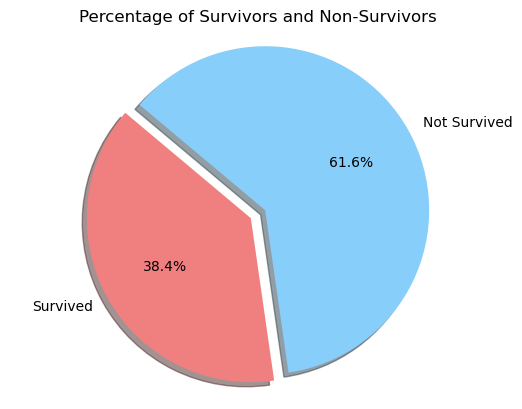

In [11]:
total_passengers = data['Survived'].count()
survivors_count = data['Survived'].sum()
non_survivors_count = total_passengers - survivors_count

survivor_percentage = (survivors_count / total_passengers) * 100
non_survivor_percentage = (non_survivors_count / total_passengers) * 100

labels = ['Survived', 'Not Survived']
sizes = [survivor_percentage, non_survivor_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Survivors and Non-Survivors')
plt.show()

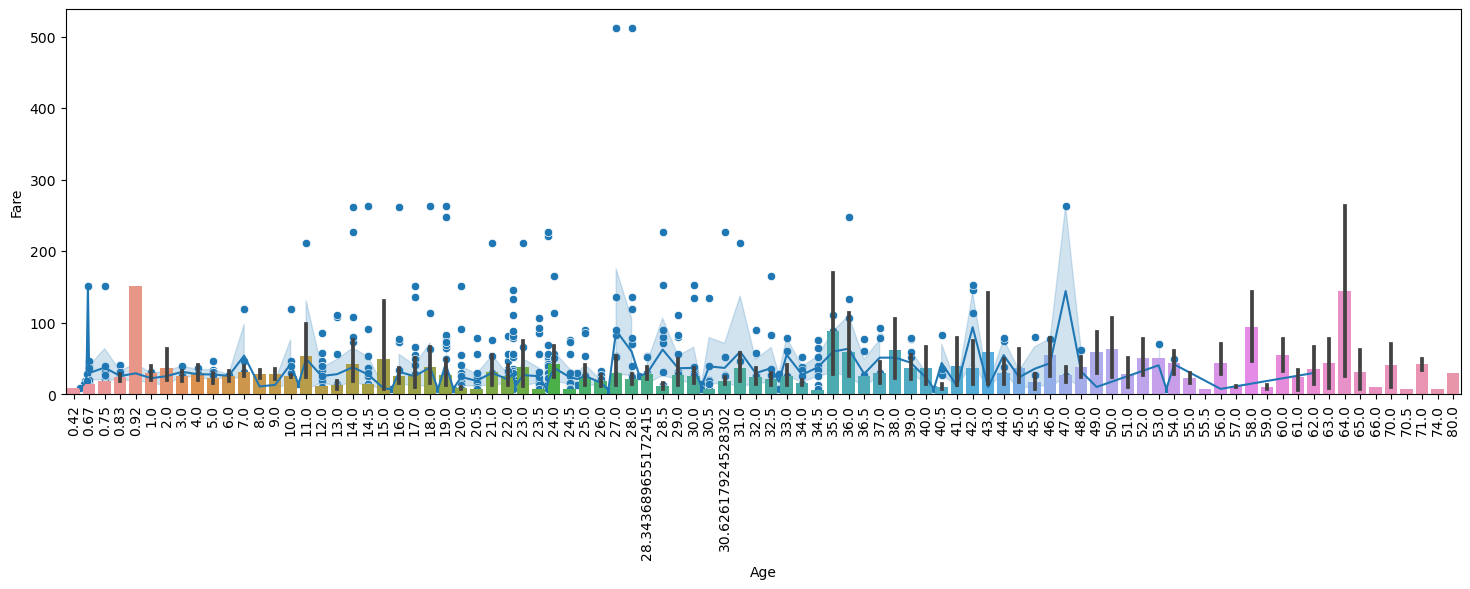

In [12]:
plt.figure(figsize=(18, 5))
ax = sns.scatterplot(x='Age', y='Fare', data=data)
sns.lineplot(x='Age', y='Fare', data=data)
sns.barplot(x='Age', y='Fare', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

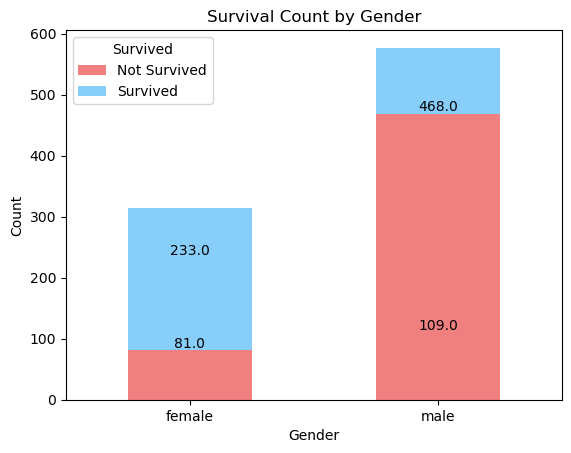

In [13]:
survived_counts = data.groupby(['Sex', 'Survived']).size().unstack()
ax = survived_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightskyblue'])
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


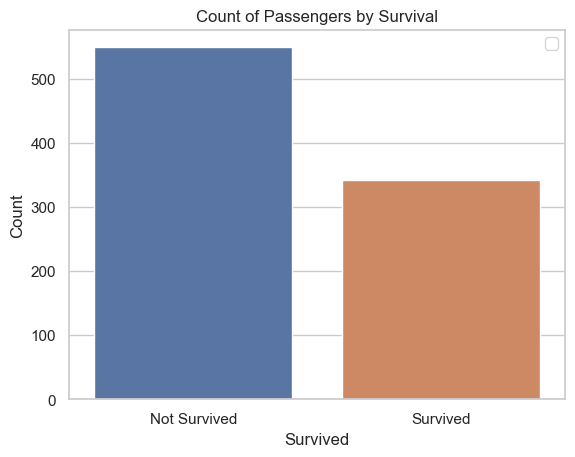

In [14]:
sns.set(style="whitegrid")
ax = sns.countplot(x="Survived", data=data)
plt.title("Count of Passengers by Survival")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.legend()
ax.set_xticklabels(["Not Survived", "Survived"])
plt.show()

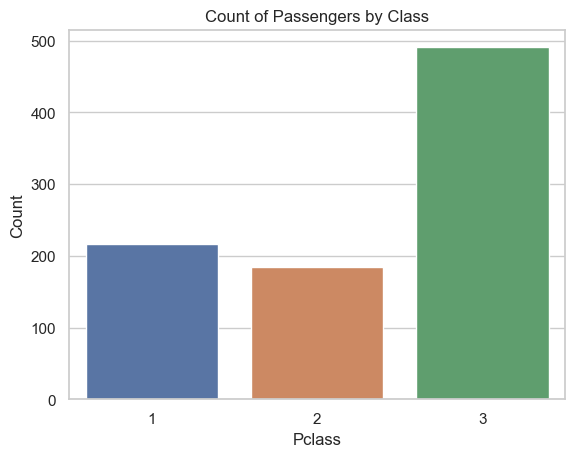

In [15]:
sns.countplot(x="Pclass", data=data)
plt.title("Count of Passengers by Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

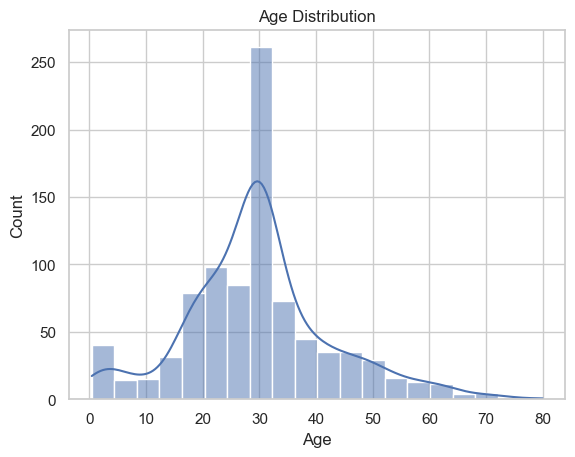

In [16]:
sns.histplot(data['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [17]:
cross_tab = pd.crosstab(data.Pclass, data.Survived, margins=True)
styled_cross_tab = cross_tab.style.background_gradient(cmap='copper')
styled_cross_tab

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [19]:
#Let's remove columns which are not required for prediction of survival
data = data.drop(columns = ['Name','Ticket','Embarked'], axis = 1)

In [20]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [21]:
data['Gender'] = data['Sex'].map({'male': 1, 'female': 0})
data = data.drop(columns=['Sex'])

In [22]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


Remember
- 1 = Male
- 0 = Female

In [23]:
correlation_matrix = data.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
PassengerId,1.000000,-0.005007,-0.035144,0.035652,-0.057527,-0.001652,0.012658,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.085364,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.327130,0.083081,0.018443,-0.549500,0.131900
Age,0.035652,-0.085364,-0.327130,1.000000,-0.230465,-0.179217,0.089267,0.092957
SibSp,-0.057527,-0.035322,0.083081,-0.230465,1.000000,0.414838,0.159651,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.179217,0.414838,1.000000,0.216225,-0.245489
Fare,0.012658,0.257307,-0.549500,0.089267,0.159651,0.216225,1.000000,-0.182333
Gender,0.042939,-0.543351,0.131900,0.092957,-0.114631,-0.245489,-0.182333,1.000000


- Analysis of Matrix :
- - Survived and Gender: There is a significant negative correlation (-0.543) between the 'Survived' variable and 'Gender,' which indicates that there's a strong relationship between gender (male or female) and the likelihood of survival. This suggests that females may have a higher chance of survival compared to males.

- - Survived and Pclass: There is a negative correlation (-0.338) between 'Survived' and 'Pclass,' which suggests that passengers in lower passenger classes (e.g., Pclass 3) had a lower chance of survival compared to those in higher classes (e.g., Pclass 1).

- - Age and Pclass: There is a negative correlation (-0.327) between 'Age' and 'Pclass,' indicating that, in general, passengers in higher passenger classes tend to be younger.

- - Fare and Pclass: There is a negative correlation (-0.549) between 'Fare' and 'Pclass,' showing that passengers in higher classes tend to pay higher fares.

- - Parch and SibSp: There is a positive correlation (0.415) between 'Parch' and 'SibSp,' which suggests that passengers with more siblings/spouses tend to have more parents/children onboard and vice versa.

- - Fare and Survived: There is a positive correlation (0.257) between 'Fare' and 'Survived,' indicating that passengers who paid higher fares had a slightly higher chance of survival.

Splitting the Data

In [24]:
from sklearn.model_selection import train_test_split
X = data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3, random_state = 40)

Feature Importance

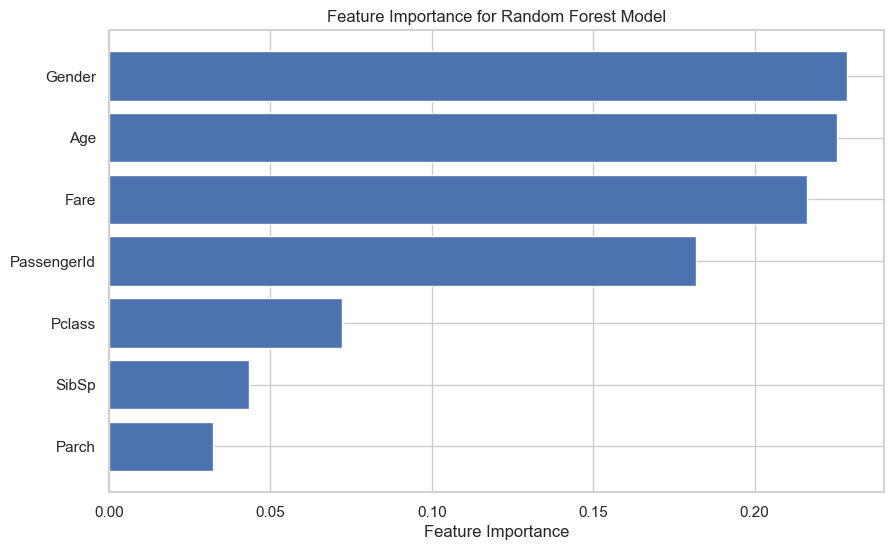

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

feature_names = X_train.columns
sorted_idx = feature_importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Model')
plt.show()

# Logistic Regression

In [26]:
X = data[['Pclass','Age','Fare','Gender']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3, random_state = 40)

In [27]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_train)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.2f}")
from sklearn.metrics import classification_report

class_report = classification_report(y_train, y_pred)
print("Classification Report:\n", class_report)
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       393
           1       0.75      0.67      0.70       230

    accuracy                           0.79       623
   macro avg       0.78      0.77      0.77       623
weighted avg       0.79      0.79      0.79       623

Confusion Matrix:
 [[341  52]
 [ 77 153]]


Learning Curve for Logistic Regression

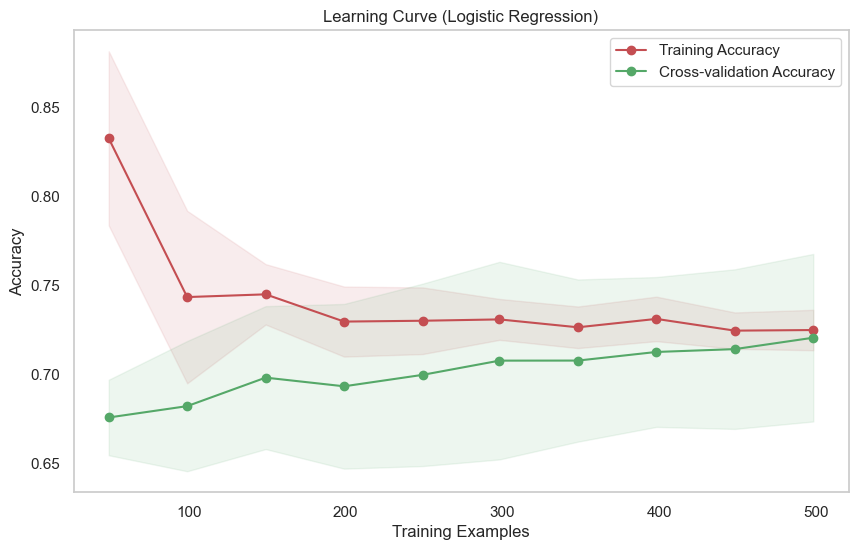

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve
logistic_model = LogisticRegression(solver='lbfgs', C=1e-2, max_iter=1000)

train_sizes, train_scores, test_scores = learning_curve(
    logistic_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring=make_scorer(accuracy_score))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Accuracy")

plt.legend(loc="best")
plt.show()

The model is showing some signs of overfitting, as indicated by the decreasing training accuracy and the performance gap between training and cross-validation accuracy. Overfitting occurs when the model fits the training data too closely and doesn't generalize well.

Optimizing Hyperparameters and Making Predictions with the Best Parameters

Penalty = Lasso

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1'], #l1  = Lasso
    'solver' : ['liblinear'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 1000, 10000]
}
logistic_regression = LogisticRegression()
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_logistic_regression = LogisticRegression(**best_params)
best_logistic_regression.fit(X_train, y_train)
y_pred_lasso = best_logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lasso)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred_lasso)
print("Classification Report:\n", report)
confusion_mat = confusion_matrix(y_test, y_pred_lasso)
print("Confusion Matrix:\n", confusion_mat)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8097014925373134
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       156
           1       0.77      0.79      0.78       112

    accuracy                           0.81       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.81      0.81      0.81       268

Confusion Matrix:
 [[129  27]
 [ 24  88]]


Penalty = Ridge

In [30]:
param_grid = {
    'penalty': ['l2'], #l2 = Ridge
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 1000, 10000]
}
logistic_regression = LogisticRegression()
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_logistic_regression = LogisticRegression(**best_params)
best_logistic_regression.fit(X_train, y_train)
y_pred_ridge = best_logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_ridge)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred_ridge)
print("Classification Report:\n", report)
confusion_mat = confusion_matrix(y_test, y_pred_ridge)
print("Confusion Matrix:\n", confusion_mat)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2'}
Accuracy: 0.8097014925373134
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       156
           1       0.77      0.79      0.78       112

    accuracy                           0.81       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.81      0.81      0.81       268

Confusion Matrix:
 [[129  27]
 [ 24  88]]


The similarities between the two outputs are that they have the same accuracy, classification report, and confusion matrix. The key differences is:

The hyperparameters: The values of hyperparameters such as 'C' (regularization strength) and 'max_iter' may differ between Ridge and Lasso. In our case, 'C' for Lasso is higher (C=100) than that for Ridge (C=10), indicating that stronger regularization is applied in Ridge.

In summary, L1 and L2 regularization achieve the same accuracy but with different coefficients due to their different penalty terms and hyperparameters. Lasso is more likely to perform feature selection by driving some coefficients to zero, while Ridge retains all features but shrinks the coefficients. The choice between them depends on our specific use case and the importance of feature selection.

*Both Lasso and Ridge regularization can be effective in controlling overfitting, but Lasso is more suitable for feature selection because of its ability to set coefficients to zero. The choice between L1 and L2 regularization depends on the specific problem and the importance of feature selection.*

Additionally, let's explore the effectiveness of an ensemble learning model with hyperparameter tuning to determine whether it performs better than logistic regression. It's crucial to take preventive measures against overfitting during this evaluation

In [31]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.8544776119402985
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       156
           1       0.88      0.75      0.81       112

    accuracy                           0.85       268
   macro avg       0.86      0.84      0.85       268
weighted avg       0.86      0.85      0.85       268

Confusion Matrix:
 [[145  11]
 [ 28  84]]


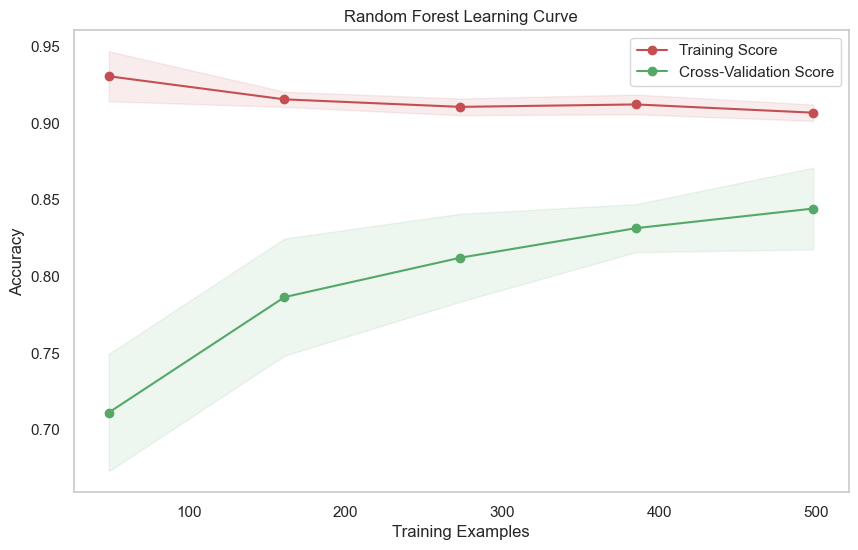

In [32]:
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

train_sizes, train_scores, test_scores = learning_curve(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.title("Random Forest Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()

- Here's what the scores indicate:

- - Training scores: These represent the model's performance on the training data. Our training scores range from 90% to 95%, which indicates that the model is able to fit the training data reasonably well. The fluctuations in training scores are normal and may be due to random variations in the data or different subsets of data used during each cross-validation fold.

- - Cross-validation scores: These represent the model's performance on unseen data (validation data) during cross-validation. Our cross-validation scores range from 71% to 84.9%, which indicates how well the model generalizes to new, unseen data. The variations in cross-validation scores are also normal and can depend on the specific data splits in each fold.

**Hence we will Deploy Random Forest Model for our predictions**

In [33]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


# Saving RF Model

In [38]:
import joblib
model_filename = 'best_rf_model.pkl'
joblib.dump(best_rf_model, model_filename)
print(f"Best Random Forest model saved as {model_filename}")

Best Random Forest model saved as best_rf_model.pkl


# Testing Data

In [48]:
test_data = pd.read_csv('testing_data.csv')
print("shape of dataset is: ", data.shape)
pd.set_option('display.max_columns', None)
test_data.head()

shape of dataset is:  (891, 8)


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,0
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,0


In [49]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
Gender          0
dtype: int64

Handling Missing values

In [50]:
mean_age = test_data['Age'].mean()
mean_fare = test_data['Fare'].mean()

test_data['Age'].fillna(mean_age, inplace=True)
test_data['Fare'].fillna(mean_fare, inplace=True)
test_data.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender         0
dtype: int64

# Making predictions on the testing dataset

In [51]:
loaded_rf_model = joblib.load(model_filename)

In [53]:
X_test = test_data[['Pclass', 'Age', 'Fare', 'Gender']]
test_predictions = loaded_rf_model.predict(X_test)

predictions_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Prediction': test_predictions})
predictions_df

,PassengerId,Prediction
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [55]:
prediction_crosstab = pd.crosstab(predictions_df['Prediction'], columns='Count')
styled_prediction_crosstab = prediction_crosstab.style.background_gradient(cmap='copper')
styled_prediction_crosstab

col_0,Count
Prediction,
0,299
1,119


In [56]:
predictions_df.to_csv("Submission.csv")

# In conclusion, the Titanic's evacuation and survival rates were influenced by various factors. Gender, age, fare, and passenger class had the most significant impact. Females, children, older passengers, and those who paid higher fares were more likely to survive. This analysis aligns with the historical accounts of prioritizing women and children during emergency situations and the potential privileges of higher-class passengers

In [57]:
print("Thankyou for your Valuable time!")

Thankyou for your Valuable time!
